# Analysis of Relations Game Experiments
This notebook collects and analyses experiment results that are run on the relations game dataset.

In [1]:
# Collect imports
from typing import Dict
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mlflow
from mlflow.tracking import MlflowClient

import utils.analysis

np.set_printoptions(suppress=True, precision=5, linewidth=120)

In [2]:
# Setup mlflow client
mlclient = MlflowClient(tracking_uri="http://localhost:8888") # Emptry string for local
exp_list = [x.name for x in mlclient.list_experiments()]
print(exp_list)

['Default', 'relsgame-dnf-model-full', '20210317-103835', '20210317-104042', '20210317-104203', '20210317-105200', '20210317-105459', '20210317-110406', '20210317-111012', '20210317-111040', '20210317-111929', '20210317-112129', '20210317-112609', '20210317-112804', '20210317-112950', '20210317-113927', '20210317-114906', '20210317-115242', '20210317-121412', '20210318-104921', '20210318-105056', '20210318-132833', '20210318-135404', '20210318-135444', '20210318-160815', '20210318-175035', '20210318-193521', '20210324-141951', '20210324-143905', '20210324-143946', '20210324-144019']


## Aggregate Experiment Results
We will look at aggregate metric performances of runs in a given experiment.

In [10]:
# Explore experiment and run data
experiment_name = "20200806-104823"
experiment_name = exp_list[-1]
mlexp = mlclient.get_experiment_by_name(experiment_name)
print(mlexp)

<Experiment: artifact_location='/data/nuric/mlflow/artifacts/2', experiment_id='2', lifecycle_stage='active', name='relsgame-full-20210302-182355', tags={}>


In [23]:
exp_data = utils.analysis.collect_experiment_data(experiment_name)
exp_data.columns

Index(['epoch', 'train_loss', 'train_acc', 'test_hexos_loss', 'test_hexos_acc',
       'test_pentos_loss', 'test_pentos_acc', 'validation_loss',
       'validation_acc', 'time', 'train_object_selector/temperature',
       'train_dnf_layer/temperature', 'run_id', 'config_json', 'seq_length',
       'seq_seq_symbols', 'seq_tasks', 'seq_train_size', 'seq_test_split',
       'seq_gen_size', 'seq_batch_size', 'seq_one_hot_labels',
       'relsgame_tasks', 'relsgame_train_size', 'relsgame_validation_size',
       'relsgame_test_size', 'relsgame_batch_size', 'relsgame_one_hot_labels',
       'dataset_name', 'dnf_image_layer_name', 'dnf_image_hidden_size',
       'dnf_image_activation', 'dnf_image_noise_stddev',
       'dnf_image_with_position', 'dnf_object_sel_layer_name',
       'dnf_object_sel_num_select', 'dnf_object_sel_initial_temperature',
       'dnf_object_feat_layer_name', 'dnf_object_feat_unary_size',
       'dnf_object_feat_binary_size', 'dnf_object_feat_activation',
       'dnf_in

,epoch,train_loss,train_acc,test_hexos_loss,test_hexos_acc,test_pentos_loss,test_pentos_acc,validation_loss,validation_acc,time,...,data_dir,max_steps,converged_loss,eval_every,debug,tracking_uri,learning_rate,run_count,test_stripes_loss,test_stripes_acc
run_id,,,,,,,,,,,,,,,,,,,,,
0173dfd6f7924522aed88fc200ad3ca2,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
06acfe55a7344ccb8439a5d59345a9fe,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
06f83cb7accf405a95317b6a7b099ecf,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
0a6cbe9f07d44dc0800cfb0e7274c631,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,0,0
0c28473b81294126b5b01aff867d6bf9,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f5567b286845476fbda8a7340ef8c548,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
f8eb7d7bdef849a18792636a5881eb0b,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
fafd08d4303944fe8feb80ab57bcff12,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300


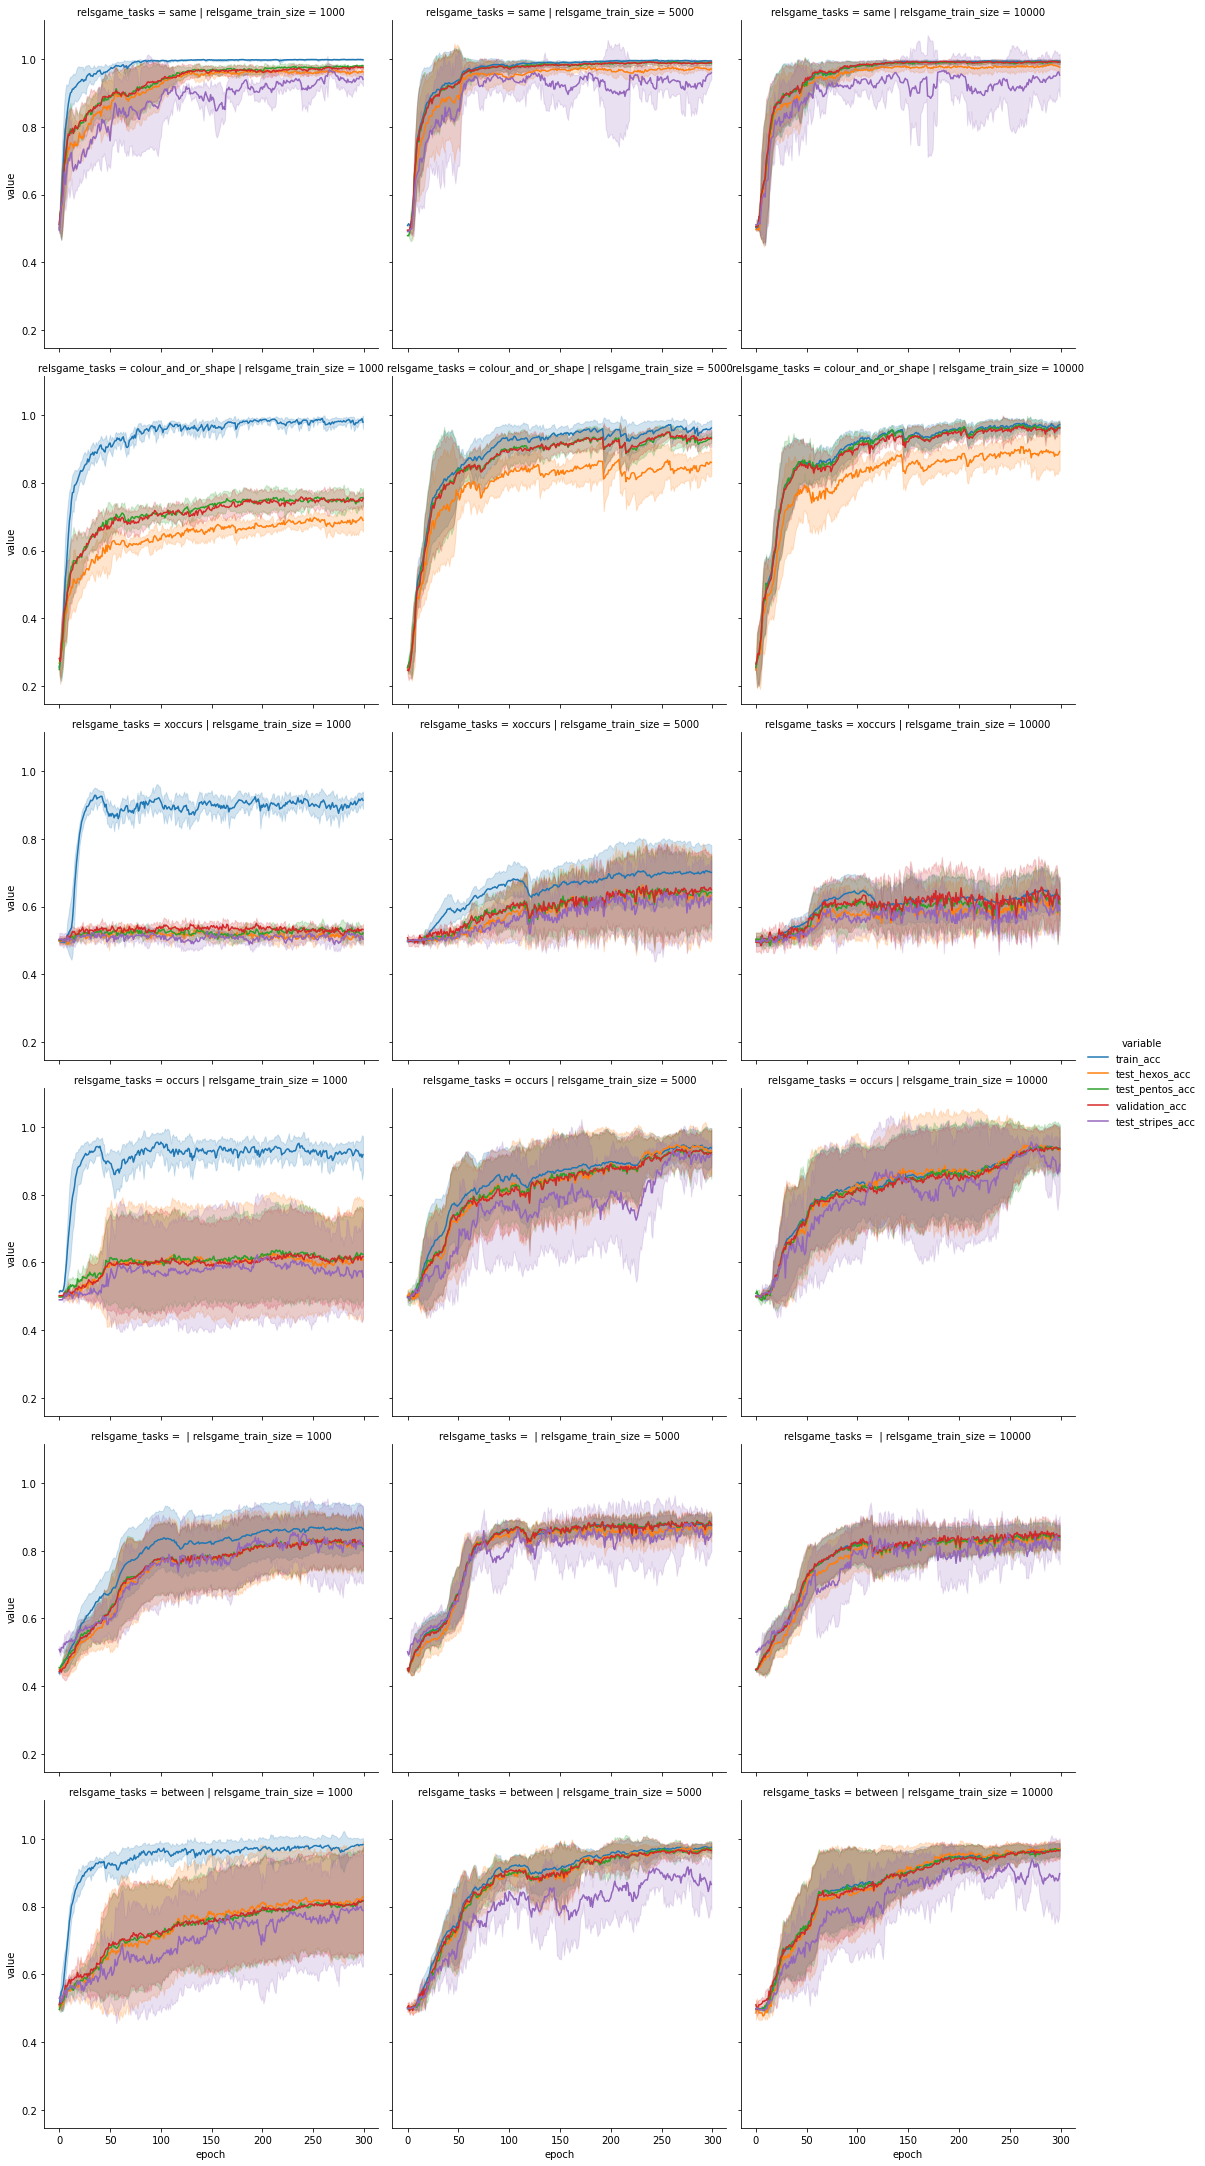

In [29]:
# Plot trainint and test results
df = exp_data.assign(relsgame_tasks=exp_data['relsgame_tasks'].map(lambda liststr: ','.join(sorted(eval(liststr)))))
df = df[((df['learning_rate'] == 0.01) & (df['dnf_image_activation'] == 'tanh'))]
display(df.groupby(['run_id']).count())
fields = [k for k in df.columns if k.endswith('loss') and k != "converged_loss"]
fields = [k for k in exp_data.columns if k.endswith('acc')]
df = df.melt(id_vars=['epoch', 'relsgame_tasks', 'relsgame_train_size'], value_vars=fields)
sns.relplot(x='epoch', y='value', hue='variable', kind='line', row='relsgame_tasks', col='relsgame_train_size', ci='sd', data=df)
# Plot accuracy
#fields = [k for k in exp_data.columns if k.endswith('acc')]
#plot_data = exp_data.melt(id_vars=['step'], value_vars=fields)
#sns.relplot(x='step', y='value', hue='variable', kind='line', data=plot_data)

## Analyse Run Report
We can pick a single run and analyse the reports such as attention maps and the rules it has learned.

In [42]:
df = exp_data.assign(relsgame_tasks=exp_data['relsgame_tasks'].map(lambda liststr: ','.join(sorted(eval(liststr)))))
df[df['relsgame_tasks'] == '']['run_id'].unique()

array(['80552b64e8a244949d4baae90ffbda4d', '93f8b5508a204f4f8c8179dcf197dff1', 'be5f268b920d4085ab00915de5908ca6',
       '062f936b656d433da4f6d8d30a425396', '2fdfc9bc6a2e4417a2c32fbe7d7abca0', '46ec7592529d4a61a4c052160f0e4358',
       '1a1637bb5947419aa924e03531c5559e', '81557c9420814f35ac6fea5060125c0d', '100dcbbe8b1c4402aa4edde95f775ee5',
       '2c16644edfba46869cc773f74b70f283', '489a109ac82443009f168ed72eb8baf5', '628336b37bf34330a5cda739a44375da',
       'd688c05b3c754d66bb928bc31b8e0e59', 'ad1155ba2ea94e359f0ef7412edcb5b4', '52b813d600014c30a1b235cd5c41e834'],
      dtype=object)

In [3]:
# Gather a specific run
run_id = "107801d186c54c6f8f8d431426b284c0"
#run_id = exp_data.groupby(by="run_id").min().index[-1]
print("Collecting artifacts for run:", run_id)
mlrun = mlclient.get_run(run_id)
pprint(mlrun.to_dictionary())
pprint(mlclient.list_artifacts(run_id))

{'data': {'metrics': {'epoch': 149.0,
                      'test_acc': 1.0,
                      'test_b': 1.3169629573822021,
                      'test_loss': 0.005908243823796511,
                      'test_m': 0.37084540724754333,
                      'test_st': 5.326624870300293,
                      'time': 3.9994707107543945,
                      'train_acc': 1.0,
                      'train_b': 1.2980446815490723,
                      'train_dnf_layer/success_threshold': 5.326625347137451,
                      'train_loss': 0.005000193137675524,
                      'train_m': 0.22404929995536804,
                      'train_st': 5.326615810394287,
                      'validation_acc': 0.9980000257492065,
                      'validation_b': 1.3169629573822021,
                      'validation_loss': 0.012696275487542152,
                      'validation_m': 0.3600029945373535,
                      'validation_st': 5.326624870300293},
          'params': {'con

In [4]:
def load_report(run_id: str, fpath: str):
    """Load numpy compressed report from given artifact."""
    local_path = mlclient.download_artifacts(run_id, fpath)
    return np.load(local_path)

report = load_report(run_id, "train_report.npz")
print(report.files)

['in_nullary', 'in_unary', 'in_binary', 'out_label', 'nullary', 'unary', 'binary', 'nullary1', 'unary1', 'binary1', 'and_kernel', 'or_kernel', 'prediction_label']


In [5]:
idxs=np.arange(8)

In [6]:
# Let's pick some examples to analyse
#labels = np.argmax(report['out_label'], -1)
labels = report['out_label']
predictions = np.argmax(report['prediction_label'], -1)
idxs = np.flatnonzero(labels != predictions)[:8]
#idxs = np.arange(8)
print(idxs)
print(np.stack([labels[idxs], predictions[idxs]]))
print(report['prediction_label'][idxs])

[ 4  5  6  8  9 10 14 17]
[[1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]]
[[6.77517]
 [5.16998]
 [7.41198]
 [5.04558]
 [5.81855]
 [7.68753]
 [5.23716]
 [5.54659]]


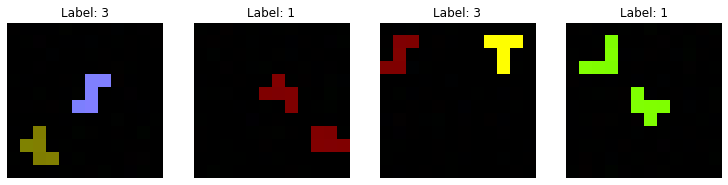

In [25]:
def plot_image(data: Dict[str, np.ndarray]):
    """Plot single image data point."""
    # data {'image': (W, H, C), 'task_id': (), 'label': ()}
    plt.imshow(np.clip((data['in_image']+1)/2, 0, 1))
    if 'out_label' in data:
        title = f"Label: {data['out_label']}"       
        if 'in_task_id' in data:
            title = f"Task: {data['in_task_id']} - " + title
        plt.title(title)
    plt.axis("off")

utils.analysis.plot_batch({k: report[k][idxs] for k in ['in_image', 'in_task_id', 'out_label'] if k in report}, plot_image, size=8)

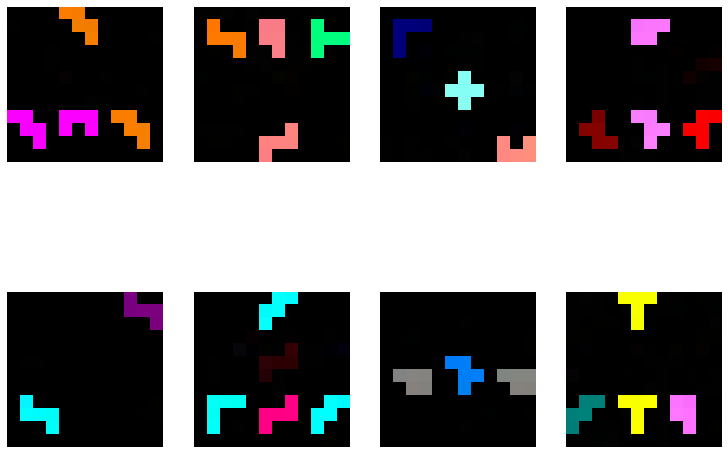

In [65]:
plot_batch({'in_image': report[k][idxs] for k in ['prediction_image'] if k in report}, plot_image, size=8)

In [32]:
for i in range(5):
    plt.imshow(report['slot_attention'][idxs[3],-1,...,i].reshape(12, 12), cmap='Blues')
    plt.show()

KeyError: 'slot_attention is not a file in the archive'

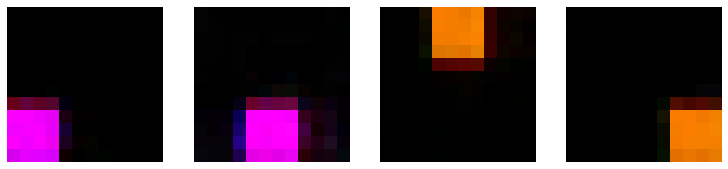

In [66]:
plot_batch({'in_image': report['reconstructions'][idxs[0]]}, plot_image, size=5)

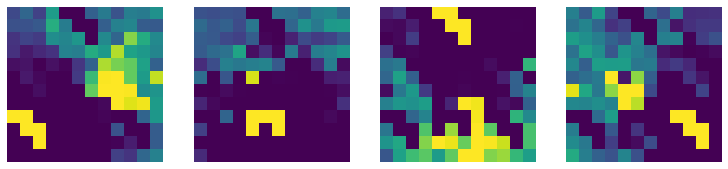

In [67]:
plot_batch({'in_image': report['recon_masks'][idxs[0]]}, plot_image, size=5)

In [26]:
report['objects'][idxs[0]]

array([[ 0.99425,  0.99436, -0.45824, -0.09985,  1.     ,  0.73243, -0.99999, -0.99238, -1.     ,  0.99995,  0.41894,
        -0.90371, -0.52904, -1.     , -0.95367,  0.99177, -0.5054 ,  0.25765, -0.99976, -0.99909,  1.     , -0.99968,
        -0.74555,  0.53767,  0.18181,  0.33278, -0.6501 , -0.45841, -0.08507,  1.     ,  0.9956 , -0.84316],
       [-0.08555,  0.99931, -0.22368,  0.75336,  0.99996,  0.45064, -0.97485, -0.17482, -1.     ,  0.88006, -0.85733,
        -0.65655,  0.66287, -1.     , -0.43723, -0.03673,  0.09265,  0.92673, -0.81948, -0.96262,  0.99999, -0.92832,
        -0.99672, -0.84292, -0.7293 ,  0.93757, -0.33182,  0.98184, -0.99016,  1.     ,  0.99898, -0.14242]],
      dtype=float32)

In [27]:
report['object_scores'][idxs[0]].reshape(3,3)

array([[-15.3664 , -16.0203 , -16.50533],
       [-15.27373,  21.04463, -16.19922],
       [  7.26193, -15.48691, -15.63882]], dtype=float32)

In [17]:
report['object_atts'][idxs[0]].reshape(4, 3, 3)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]],

       [[0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 1.],
        [0., 0., 0.]],

       [[0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [7]:
report['and_kernel']

array([[[ 1.00093, -1.01694, -0.02924, -0.10766, -0.2273 ,  0.1046 ,  0.14273, -1.10859,  0.74163, -0.73337,
         -0.00923, -0.37795,  0.00825, -0.07912,  0.04002, -0.03292,  0.11979,  0.03524, -0.10512, -0.12502],
        [ 0.84665, -0.87105, -0.09866, -0.32893,  0.45762, -0.72499,  0.28904, -0.27503, -0.40485,  0.1695 ,
         -0.23824, -0.83431, -0.90575,  0.29822, -0.38117,  0.55304, -0.05196, -0.37436, -0.13585,  0.03934],
        [-0.93285, -0.38093,  0.20883, -0.15018,  1.15313,  1.17279,  1.33636,  1.26337,  0.18284,  0.97027,
         -0.99351,  1.19931, -1.09601, -0.04503,  1.34223, -1.3992 ,  0.03713, -0.03626, -1.20988,  1.23158],
        [ 0.77125, -0.8889 ,  0.13653, -0.20171,  0.00837,  0.56596, -0.11234, -0.39732,  0.66675, -0.98193,
          0.22531, -0.49642,  0.11931,  0.29833,  1.00698,  0.80013, -0.24622,  0.11037,  0.00875, -0.42767],
        [-0.90704,  2.42554, -0.10016,  0.04331, -1.1853 , -1.01891, -0.00295,  1.10249,  0.85049,  1.00968,
          1.150

In [8]:
report['or_kernel']

array([[-0.68291, -0.61269,  1.03221, -0.63406,  1.16593,  1.02316,  1.21928, -0.66466]], dtype=float32)

In [9]:
report['binary'][:2]

array([[[[ 1., -1., -1., -1.],
         [ 1., -1., -1.,  1.],
         [ 1., -1.,  1.,  1.]],

        [[ 1., -1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.],
         [-1., -1., -1., -1.]],

        [[-1.,  1.,  1.,  1.],
         [-1.,  1., -1.,  1.],
         [ 1.,  1., -1., -1.]],

        [[-1., -1., -1.,  1.],
         [-1.,  1.,  1.,  1.],
         [-1., -1., -1., -1.]]],


       [[[-1.,  1.,  1., -1.],
         [ 1., -1.,  1., -1.],
         [-1.,  1., -1.,  1.]],

        [[-1.,  1., -1., -1.],
         [-1., -1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.]],

        [[-1.,  1., -1.,  1.],
         [ 1., -1., -1.,  1.],
         [ 1.,  1., -1., -1.]],

        [[ 1.,  1.,  1.,  1.],
         [-1.,  1., -1., -1.],
         [ 1., -1.,  1.,  1.]]]], dtype=float32)